In [134]:
import pandas as pd
import sklearn

In [135]:
from sklearn import datasets

In [136]:
iris = datasets.load_iris

In [137]:
iris

<function sklearn.datasets._base.load_iris>

# Datasets:

In [138]:
diabetes = pd.read_csv('https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv')
diabetes.sample(5)

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
130,4,173,70,14,168,29.7,0.361,33,testado_positivo
633,1,128,82,17,183,27.5,0.115,22,testado_negativo
307,0,137,68,14,148,24.8,0.143,21,testado_negativo
506,0,180,90,26,90,36.5,0.314,35,testado_positivo
734,2,105,75,0,0,23.3,0.560,53,testado_negativo


In [139]:
batimentos = pd.read_csv('https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv')
batimentos.sample(5)

,Idade,Peso,Horas de atividade,Batimentos cardiacos
45,63.090937,113.890998,18.472750,131.801630
529,62.774636,112.878834,18.219709,130.362634
731,71.255688,140.018200,25.004550,152.457635
500,67.457559,127.864190,21.966048,148.129271
383,63.242557,114.376181,18.594045,134.240501


In [140]:
colesterol = pd.read_csv('https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv')
colesterol.sample(5)

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
183,59,1,1,178,0,2,145,0,4.2,3,0,7,0,270
132,29,1,2,130,0,2,202,0,0.0,1,0,3,0,204
97,60,0,4,150,0,2,157,0,2.6,2,2,7,3,258
223,53,1,4,123,0,0,95,1,2.0,2,2,7,3,282
283,35,1,2,122,0,0,174,0,0.0,1,0,3,0,192


### Nota:

Para praticar todos os conceitos que serão apresentados durante o curso, seguem algumas sugestões para acessar bases de dados:

[Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) - Bases de dados disponíveis na própria biblioteca do Scikit - Learn para treino.


[Site da UCI](https://archive.ics.uci.edu/ml/index.php) - Um repositório com diversas bases de dados para aplicação do machine learning.

# Diabetes: resolvendo um problema de CLASSIFICAÇÃO

## Utilizando algoritimo de árvore de decisão (supervisionado)

Verificando uma amostra dos dados para seleção das features e do label:

In [141]:
diabetes.sample()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
240,1,91,64,24,0,29.2,0.192,21,testado_negativo


Utilizaremos todas as colunas para serem features, logo, dropamos apenas a coluna 'resultado', que será nossos labels (a referida 'supervisão' dos resultados), e colocamos o dataset de features na variavel x:

In [142]:
x = diabetes.drop('resultado', axis=1)
x.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Separando a coluna 'resultado' e alocando na variavel y, nossos labels:

In [143]:
y = diabetes['resultado']
y.head()

0    testado_positivo
1    testado_negativo
2    testado_positivo
3    testado_negativo
4    testado_positivo
Name: resultado, dtype: object

No código a seguir, importamos as bibliotecas de separação de treino e teste, além do algoritimo arvore de decisão, que utilizaremos para este problema de classificação.

Definimos uma SEED para obtermos resultados similares, instanciamos o treino e teste em suas respectivas variáveis e após isto, instanciamos nosso classificador, utilizando nossa seed e passando o argumento de profundidade maxima da arvore de decisao.

Após isto, fazemos o ajuste das variáveis de treino e, por fim, fazemos a avaliação final da acurácia com os testes.

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)  # clf => classifier, termo comum da comunidade
clf_arvore.fit(x_treino, y_treino)

clf_arvore.score(x_teste, y_teste)

0.7708333333333334

In [145]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(x_treino, y_treino)

clf_dummy.score(x_teste, y_teste)

0.6875

# Batimentos cardíacos: resolvendo um problema de REGRESSÃO (supervisionado)

In [146]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


Avaliando os dados em forma de gráfico:

<Figure size 7200x3600 with 0 Axes>

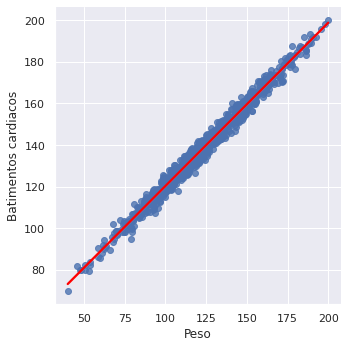

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(100, 50))

sns.lmplot(x='Peso', y='Batimentos cardiacos',
           data=batimentos,
           line_kws={'color':'red'})
plt.show()

In [148]:
x = batimentos[['Peso', 'Idade']]
y= batimentos['Batimentos cardiacos']

In [149]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

SEED = 4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

rgs = linear_model.LinearRegression(fit_intercept=False) # , normalize=True)

rgs.fit(x_treino, y_treino)

rgs.score(x_teste, y_teste)

0.9872272899997122

## Nota:  Utiliza-se a classificação para previsões categóricas e a regressão para previsões numéricas e contínuas.

# Colesterol: resolvendo um problema de CLUSTERING (não-supervisionado)

In [150]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


Visualizando as variáveis selecionadas em um gráfico:

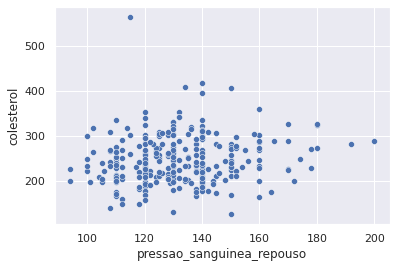

In [151]:
import seaborn as sns

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

Utilizando o algoritimo KMeans para agrupamento

In [152]:
from sklearn.cluster import KMeans

In [153]:
kmeans = KMeans(n_clusters = 2, random_state = 9)

In [154]:
x = colesterol

como não é supervisionado, nao precisamos do Y.

In [155]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

Duas colunas como object, que não podem ser utilizadas no algoritimo, pois ele precisa de int float.

DataFrame.select_dtypes(include=None, exclude=None)


Return a subset of the DataFrame’s columns based on the column dtypes.

In [156]:
x = colesterol.select_dtypes('int64')

In [157]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [158]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

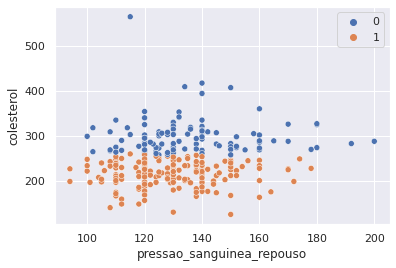

In [159]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol, hue = kmeans.labels_)

In [160]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [161]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64

# Mapa dos algoritimos SKlearn

Você sabia que na própria documentação da biblioteca existe uma imagem explicativa sobre qual modelo seguir de acordo com o seu objetivo e estrutura de dados?

Clique [aqui](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) para visualizar.
